


# Redução da Dimensionalidade 

Demonstração: reduzir a dimensão de determinantes socioeconômicos da realização de 7 ou mais consultas pré-natal nos municípios brasileiros

In [1]:
import pandas as pd #biblioteca para processamento de dataframes em Python
import numpy as np #biblioteca para processamento numérico em python

from sklearn.preprocessing import scale # funcao de pre-processamento de dados

# semente de aleatoriedade
np.random.seed(42)

In [2]:
### leitura do arquivo CSV disponibilizado no google drive
municipios = pd.read_csv('https://drive.google.com/uc?export=download&id=18jyOiEucdZxphxqL57iP4R66-0JdP_kU', sep=";")

In [3]:
# lista top 5 registros
municipios.head()

,prenatal,renda,saneamento,desemprego,analfabet,Gini,fundamental,PIB_per_capita
0,48.30,467.72,0.288858,5.01,12.0,0.5893,37.29,13760.40
1,54.04,672.87,1.174262,4.64,7.9,0.5496,51.30,14315.36
2,40.50,446.58,0.101266,2.49,13.8,0.5166,36.59,15745.16
3,59.42,718.79,40.103242,5.87,8.3,0.5890,48.49,14870.59
4,52.52,553.47,0.093493,5.24,10.4,0.5147,44.23,15997.56


In [4]:
# biblioteca para geracao de graficos em Python
import matplotlib.pyplot as plt
# informamos que estamos usando o notebook
%matplotlib inline


In [5]:
# importamos a funcao PCA da biblioteca scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [6]:
# criamos a funcao
pca = PCA(random_state=42)

In [7]:
# ajustamos os dados, ignoramos a variavel 'pre-natal' (variavel de interesse)
municipios_scaled = scale(municipios.drop(['prenatal'], axis=1))



In [8]:
# executamos o PCA
pca.fit(municipios_scaled)

PCA(random_state=42)

In [ ]:
# No scikit-learn o valor dos EigenValues ficam armazenados em explained_variance_
print('Eigenvalues = ', pca.explained_variance_)

Eigenvalues =  [3.37348941 1.19313218 0.87576566 0.68734261 0.52950922 0.17949657
 0.16252244]


[]

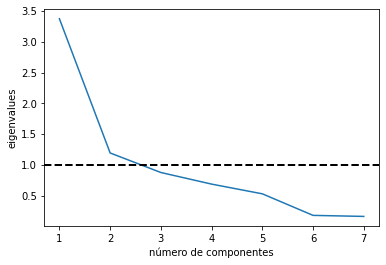

In [ ]:
x = np.arange(pca.explained_variance_.shape[0]) + 1
plt.plot(x, pca.explained_variance_)
plt.axhline(1.0, color = 'black', linestyle = '--', linewidth = 2)
plt.xlabel('número de componentes')
plt.ylabel('eigenvalues')
plt.plot()

[]

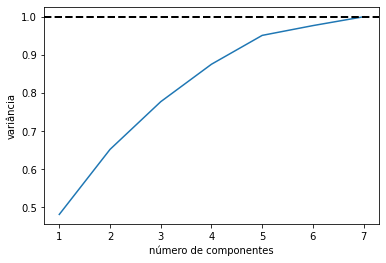

In [ ]:
x = np.arange(pca.explained_variance_.shape[0]) + 1
plt.plot(x, np.cumsum(pca.explained_variance_ratio_))
plt.axhline(1.0, color = 'black', linestyle = '--', linewidth = 2)
plt.xlabel('número de componentes')
plt.ylabel('variância')
plt.plot()

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('numero minimo de componentes de modo a preservar 95% da variância do conjunto de dados: ',  d)

numero minimo de componentes de modo a preservar 95% da variância do conjunto de dados:  5


In [ ]:
pca_fitted = PCA(n_components=2, random_state=42)

res_dataset = pd.DataFrame(pca_fitted.fit_transform(municipios_scaled))
res_dataset

,0,1
0,-0.490076,-0.165627
1,0.968842,-0.124104
2,-0.196800,-1.134865
3,1.086161,0.759095
4,0.411981,-0.384681
...,...,...
5560,0.949837,-1.064450
5561,0.309610,-0.632137
5562,-0.439939,0.129597
5563,-0.720960,-1.086714


novo dataset:

EXTRA: PCA - Conferência numérica

In [ ]:
pd.DataFrame(pca_fitted.components_.T * np.sqrt(pca_fitted.explained_variance_), columns=['PC1', 'PC2'],  index=municipios.drop(['prenatal'], axis=1).columns.values)

,PC1,PC2
renda,0.904294,-0.035419
saneamento,0.557631,0.407738
desemprego,-0.347714,0.838828
analfabet,-0.903455,0.044404
Gini,-0.478634,0.448735
fundamental,0.847711,0.313862
PIB_per_capita,0.599960,0.141953


In [ ]:
res_dataset['outcome'] = scale(municipios['prenatal'])

In [ ]:
res_dataset.head()

,0,1,outcome
0,-0.490076,-0.165627,-0.590769
1,0.968842,-0.124104,-0.307365
2,-0.196800,-1.134865,-0.975883
3,1.086161,0.759095,-0.041736
4,0.411981,-0.384681,-0.382413


In [ ]:
res_dataset.corr()

,0,1,outcome
0,1.000000e+00,-3.683920e-16,0.681355
1,-3.683920e-16,1.000000e+00,-0.232855
outcome,6.813548e-01,-2.328551e-01,1.000000
